In [6]:
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.common.by import By
import csv
import time
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [12]:
class AmazonWebScraper:
    def __init__(self, product_name, pages = 1):
        self.product_name = product_name.replace(" ", "+")
        self.pages = pages
        self.options = webdriver.ChromeOptions()
        self.options.headless = True
        self.options.add_argument("start-maximized")
        self.options.add_experimental_option("excludeSwitches", ["enable-automation"])
        self.options.add_experimental_option('excludeSwitches', ['enable-logging'])
        self.options.add_experimental_option('useAutomationExtension', False)
        self.options.add_argument('--disable-blink-features=AutomationControlled')  
        self.options.add_argument("--headless=new")
        self.driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
        self.data = []
        self.csv_file = "product.csv"
        
    def details(self, url):
        
        
        self.driver.get(url)
        # print(self.driver)
        try:
            product_name = self.driver.find_element(By.ID, "title").text
        except:
            product_name = "N/A"
            print("Product name not found")
        try:
            price = self.driver.find_element(By.CLASS_NAME, "a-price-whole").text
        except:
            price = "N/A"
            print("Price not found")

        try: 
            description_list = self.driver.find_element(By.CSS_SELECTOR, "ul.a-unordered-list.a-vertical.a-spacing-mini")
            description_items = description_list.find_elements(By.TAG_NAME, "li")
            description_data = []
            for item in description_items:
                description_data.append(item.find_element(By.TAG_NAME, "span").text.strip())
        except:
            description_data = ["N/A"]
            print("Description not found")
            
        try: 
            featured_image = self.driver.find_element(By.ID, "landingImage").get_attribute("src")
        except:
            featured_image = "N/A"
            print("Featured image not found")
        try:
            rating = self.driver.find_element(By.ID, "acrPopover").text.strip()
        except:
            rating = "N/A"
            print("Rating not found")
        data = {
            "url": url,
            "Product Name": product_name,
            "Price": price,
            "Description": description_data,
            "Feature Image": featured_image,
            "Rating": rating,
        }
        return data
    def scrape(self):
        for page_number in range(1, self.pages + 1):
            main_lobby = f"https://www.amazon.com/s?k={self.product_name}&page={page_number}"
            print(f"Scraping page {page_number}: {main_lobby}")
            self.driver.get(main_lobby)
            item_list = self.driver.find_elements(By.CSS_SELECTOR, 'div.s-result-item[data-component-type="s-search-result"]')
            print(f"Total items found on page {page_number}: {len(item_list)}")
            link_list = []
            for link in item_list:
                link_list.append(link.find_element(By.TAG_NAME, "a").get_attribute("href"))
            for link in link_list:
                d = self.details(link)
                self.data.append(d)
                print(d)
        if os.path.exists(self.csv_file):
            os.remove(self.csv_file)
        with open(self.csv_file, mode="w", newline="", encoding="utf-8") as file:
            writer = csv.writer(file)
            writer.writerow(self.data[0].keys())
            for row in self.data:
                writer.writerow(row.values())
        self.driver.quit()
        print(f"Data saved to {self.csv_file}")
    def get_data(self):
        return pd.DataFrame(self.data)
    def get_csv(self):
        return pd.read_csv(self.csv_file)

scraper = AmazonWebScraper(product_name="NVIDIA RTX 5090", pages=10)
scraper.scrape() 


Scraping page 1: https://www.amazon.com/s?k=NVIDIA+RTX+5090&page=1
Total items found on page 1: 16
{'url': 'https://www.amazon.com/PNY-Overclocked-Graphics-3-5-Slot-Epic-XTM/dp/B0DTJFSSZG/ref=sr_1_1?dib=eyJ2IjoiMSJ9.fvh4S5rKENwscVdC05tdNplympEte2vOQT9rX6FfcpgMpruZnv4RTkvRkJWX7d_sJ7VI3-mn9bOdbB9aXMKXvRvYGnRN7nG1FzfQu6V9joKEQ7fnRBxvrDt8Vg1bJ8JpjgulI6hJ2ovp5rLAt5HBGVnuX73p7q1OatLKspxsrhHnV989G84KjfiScoCIOvvJdjKB_vGAcWmKN5wD3EELNqSVhC0LqFoJ273SxTnisAg.ZcbbE6PlyAhkwZa17I-VI0FJ2mOTIa4bVTwDGB7cBNo&dib_tag=se&keywords=NVIDIA+RTX+5090&qid=1756534123&sr=8-1', 'Product Name': 'PNY NVIDIA GeForce RTX™ 5090 32GB ARGB Overclocked Triple Fan Graphics Card (DLSS 4, PCIe® 5.0, HDMI®/DP 2.1, 3.5-Slot, Epic-X™ RGB Lighting)', 'Price': '2,517', 'Description': ['NVIDIA DLSS 4 - Supreme Speed. Superior Visuals. Powered by AI. DLSS is a revolutionary suite of neural rendering technologies that uses AI to boost FPS, reduce latency, and improve image quality. \u200cThe latest breakthrough, DLSS 4, brings new M

In [14]:
d = scraper.get_data()
f = pd.DataFrame(d)
f

,url,Product Name,Price,Description,Feature Image,Rating
0,https://www.amazon.com/PNY-Overclocked-Graphic...,PNY NVIDIA GeForce RTX™ 5090 32GB ARGB Overclo...,"2,517",[NVIDIA DLSS 4 - Supreme Speed. Superior Visua...,https://m.media-amazon.com/images/I/61lmZjZXot...,4.2
1,https://www.amazon.com/ASUS-Military-Grade-Com...,ASUS TUF Gaming GeForce RTX ™ 5090 32GB GDDR7 ...,"2,700",[Powered by the NVIDIA Blackwell architecture ...,https://m.media-amazon.com/images/I/71-gK950-S...,4.5
2,https://www.amazon.com/MSI-Graphics-512-bit-Ex...,MSI Gaming RTX 5090 32G Gaming Trio OC Graphic...,"2,399","[Chipset: NVIDIA GeForce RTX 5090, Video Memor...",https://m.media-amazon.com/images/I/71tV-csYdC...,4.5
3,https://www.amazon.com/GIGABYTE-Graphics-WINDF...,GIGABYTE GeForce RTX 5090 Gaming OC 32G Graphi...,"2,599",[Powered by the NVIDIA Blackwell architecture ...,https://m.media-amazon.com/images/I/71TZmq7RYt...,3.9
4,https://www.amazon.com/ZOTAC-Graphics-IceStorm...,ZOTAC Gaming GeForce RTX 5090 Solid OC DLSS 4 ...,"2,227",[Powered by the NVIDIA Blackwell architecture ...,https://m.media-amazon.com/images/I/71c7k-TNof...,4.2
...,...,...,...,...,...,...
164,https://www.amazon.com/MSI-Infinite-RS-AI-2NVZ...,[2025] MSI Infinite RS AI 2NVZ9-1289US (Intel ...,"5,449",[Graphics Card: NVIDIA GeForce RTX 5090 32GB G...,https://m.media-amazon.com/images/I/6180fy8gNw...,N/A
165,https://www.amazon.com/Skytech-Gaming-Desktop-...,"Skytech Prism 4 Gaming PC Desktop, Ryzen 7 980...","4,399",[AMD Ryzen 7 9800X3D 4.7GHz (5.2GHz Turbo Boos...,https://m.media-amazon.com/images/I/8194SX6exV...,N/A
166,https://www.amazon.com/RTX-5060-8G-OC-Performa...,MSI Gaming RTX 5060 Ti 8G Gaming OC Graphics C...,389,"[TORX Fan 4.0: A masterpiece of teamwork, fan ...",https://m.media-amazon.com/images/I/71gStSRWv+...,4.1
167,https://www.amazon.com/Skytech-Gaming-Prism-De...,"Skytech Gaming Prism 4 Desktop PC, Intel Ultra...","5,299",[Intel Core Ultra 9 U9 285K 3.7GHz (5.5GHz Tur...,https://m.media-amazon.com/images/I/71Hh24R0vg...,N/A


['4.2', '4.5', '4.5', '3.9', '4.2', '4.3', '3.9', '4.0', '4.4', '4.6', 'N/A', 'N/A', '4.6', '4.8', '4.6', '4.3', '4.2', '4.1', '5.0', '4.0', '3.7', '4.6', '4.6', '4.6', '4.4', '4.0', '4.3', '4.5', '4.5', 'N/A', '2.8', '3.1', '4.6', '4.2', '4.1', '3.1', '4.9', '4.5', '4.3', '4.2', '4.2', 'N/A', '4.7', '4.4', 'N/A', '4.7', '4.6', '5.0', '4.7', '5.0', '4.2', '4.6', '4.1', '4.4', '4.2', '4.7', '4.7', '1.0', '4.1', 'N/A', '4.5', '4.4', '4.6', '5.0', 'N/A', '1.0', 'N/A', '4.2', '5.0', '4.6', 'N/A', '4.7', '5.0', '4.6', '4.6', 'N/A', '4.3', '3.7', '4.0', '4.7', '5.0', 'N/A', '4.3', '5.0', '4.2', 'N/A', '5.0', '4.1', '4.7', '5.0', '4.8', '5.0', 'N/A', '4.7', '5.0', '4.3', '4.3', '4.6', '4.3', '4.3', '3.0', '4.2', '4.7', '4.3', '4.3', 'N/A', 'N/A', '4.5', '2.5', '4.2', 'N/A', '4.6', 'N/A', '5.0', '4.5', '3.8', '4.6', '4.8', '4.2', '4.8', '4.4', '4.1', 'N/A', 'N/A', '3.6', '4.7', '4.1', '4.5', '3.7', '3.9', '4.9', 'N/A', '3.1', 'N/A', '5.0', '4.2', 'N/A', 'N/A', '4.3', 'N/A', 'N/A', '3.9', 'N/A'

[]

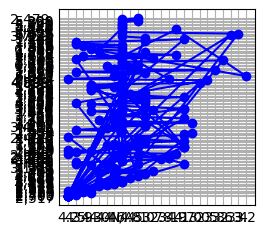

In [ ]:
ratings = list(f['Rating'])
print(ratings)
print(len(ratings))
numpy_array = np.arange(1, 5001, 10)
price = list(f['Price'])

print(price)

plt.plot(ratings, price, color='blue', marker='o')
plt.plot()


In [41]:
new_data = scraper.get_data().copy()

data_rating = list(new_data['Rating'])
data_price = list(new_data['Price'])



def clean_rating(rating):
    if rating == 'N/A' or not rating:
        return None
    try:
        # Extract numeric rating (handle cases like "4.5 out of 5")
        if 'out of' in str(rating):
            return float(str(rating).split()[0])
        else:
            return float(rating)
    except:
        return None
    
def clean_price(price):
    if price == 'N/A' or not price:
        return None
    try:
        # Remove commas, dollar signs, periods at end
        cleaned = str(price).replace(',', '').replace('$', '').rstrip('.')
        return float(cleaned)
    except:
        return None
    
data_rating_clean = [clean_rating(rating) for rating in data_rating]
data_price_clean = [clean_price(price) for price in data_price]

# print(data_rating_clean)
# print(data_price_clean)
# print(len(data_rating_clean))
# print(len(data_price_clean)

i = 0

while i < len(data_rating_clean):
    if data_rating_clean[i] is None or data_price_clean[i] is None:
        data_rating_clean.pop(i)
        data_price_clean.pop(i)
    else:
        i += 1
        
print(data_rating_clean)
print(data_price_clean)
print(len(data_rating_clean))
print(len(data_price_clean))

    

[4.2, 4.5, 4.5, 3.9, 4.2, 4.3, 3.9, 4.0, 4.4, 4.6, 4.6, 4.8, 4.6, 4.3, 4.2, 4.1, 5.0, 4.0, 3.7, 4.6, 4.6, 4.6, 4.4, 4.0, 4.3, 4.5, 4.5, 2.8, 3.1, 4.6, 4.2, 4.1, 3.1, 4.9, 4.5, 4.3, 4.2, 4.2, 4.7, 4.4, 4.7, 4.6, 5.0, 4.7, 5.0, 4.2, 4.6, 4.1, 4.4, 4.2, 4.7, 4.7, 1.0, 4.1, 4.5, 4.4, 4.6, 5.0, 1.0, 4.2, 5.0, 4.6, 4.7, 5.0, 4.6, 4.6, 4.3, 3.7, 4.0, 4.7, 5.0, 4.3, 5.0, 4.2, 5.0, 4.1, 4.7, 5.0, 4.8, 5.0, 4.7, 5.0, 4.3, 4.3, 4.6, 4.3, 4.3, 3.0, 4.2, 4.7, 4.3, 4.3, 4.5, 2.5, 4.2, 4.6, 5.0, 4.5, 3.8, 4.6, 4.8, 4.2, 4.8, 4.4, 4.1, 3.6, 4.7, 4.1, 4.5, 3.7, 3.9, 4.9, 3.1, 5.0, 4.2, 4.3, 3.9, 4.5, 4.5, 5.0, 4.7, 5.0, 2.3, 4.2, 4.1, 3.4, 4.9, 3.2, 4.0, 4.1, 4.1]
[2517.0, 2700.0, 2399.0, 2599.0, 2227.0, 2474.0, 2638.0, 2276.0, 2824.0, 2539.0, 2999.0, 2639.0, 619.0, 2399.0, 2517.0, 1293.0, 2699.0, 3179.0, 2499.0, 3739.0, 2499.0, 3309.0, 3178.0, 3299.0, 999.0, 549.0, 899.0, 3401.0, 4099.0, 2249.0, 2517.0, 2599.0, 4099.0, 2939.0, 1635.0, 1400.0, 2879.0, 2939.0, 299.0, 574.0, 549.0, 1079.0, 1189.0, 349.0,

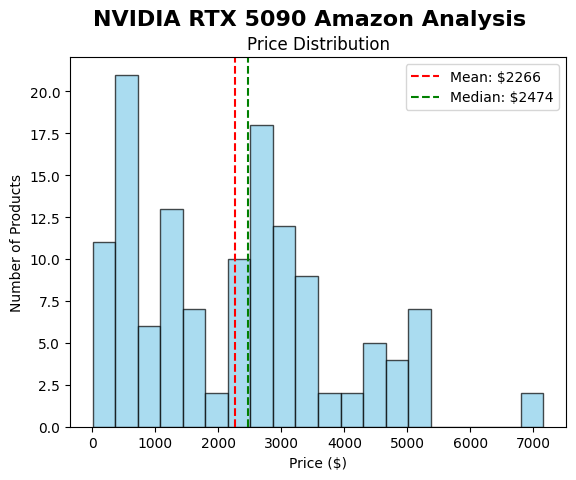

In [48]:
plt.style.use('default')
plt.suptitle("NVIDIA RTX 5090 Amazon Analysis", fontsize=16, fontweight='bold')
plt.hist(data_price_clean, bins=20, color='skyblue', alpha=0.7, edgecolor='black')
plt.xlabel("Price ($)")
plt.ylabel("Number of Products")
plt.title("Price Distribution")

mean_price = np.mean(data_price_clean)
median_price = np.median(data_price_clean)

plt.axvline(mean_price, color='red', linestyle='--', label=f'Mean: ${mean_price:.0f}')
plt.axvline(median_price, color='green', linestyle='--', label=f'Median: ${median_price:.0f}')
plt.legend()
plt.show()






